Epoch 1/200
132/132 [==============================] - 2s 8ms/step - loss: 0.6805 - accuracy: 0.5549 - val_loss: 0.6768 - val_accuracy: 0.5199
Epoch 2/200
132/132 [==============================] - 1s 9ms/step - loss: 0.6706 - accuracy: 0.5615 - val_loss: 0.6730 - val_accuracy: 0.5473
Epoch 3/200
132/132 [==============================] - 1s 9ms/step - loss: 0.6680 - accuracy: 0.5639 - val_loss: 0.6761 - val_accuracy: 0.5398
Epoch 4/200
132/132 [==============================] - 1s 7ms/step - loss: 0.6661 - accuracy: 0.5582 - val_loss: 0.6837 - val_accuracy: 0.5398
Epoch 5/200
132/132 [==============================] - 1s 6ms/step - loss: 0.6658 - accuracy: 0.5656 - val_loss: 0.6707 - val_accuracy: 0.5303
Epoch 6/200
132/132 [==============================] - 1s 6ms/step - loss: 0.6658 - accuracy: 0.5634 - val_loss: 0.6732 - val_accuracy: 0.5492
Epoch 7/200
132/132 [==============================] - 1s 6ms/step - loss: 0.6658 - accuracy: 0.5596 - val_loss: 0.6766 - val_accuracy: 0.5331

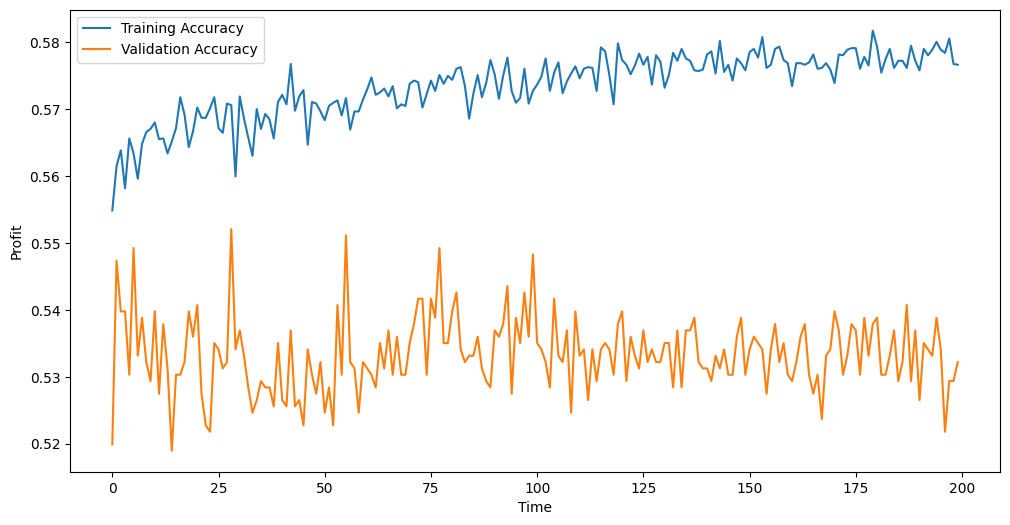

In [21]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Загрузка данных
data = pd.read_csv('applerevenue .csv')

# Функция для вычисления прибыли и преобразования в бинарную классификацию
def calculate_profit(row):
    open_price = row['open']
    close_price = row['close']
    volume = row['volume']

    if close_price > open_price:
        profit = 1  # Положительная прибыль
    else:
        profit = 0  # Отрицательная прибыль

    return profit

# Подготовка данных
features = data[['open', 'high', 'low', 'volume']].values
target = data.apply(calculate_profit, axis=1).values

# Нормализация данных
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

# Разделение данных на тренировочную, валидационную и тестовую выборки
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

# Обучение нейронной сети
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Обучение модели
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, batch_size=64)

# Оценка модели на тестовой выборке
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy * 100)

# Визуализация графика точности модели
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Time')
plt.ylabel('Profit')
plt.legend()
plt.show()


Epoch 1/200
132/132 [==============================] - 3s 5ms/step - loss: 0.6821 - accuracy: 0.5503 - val_loss: 0.6782 - val_accuracy: 0.5322
Epoch 2/200
132/132 [==============================] - 0s 4ms/step - loss: 0.6703 - accuracy: 0.5627 - val_loss: 0.6829 - val_accuracy: 0.5445
Epoch 3/200
132/132 [==============================] - 1s 4ms/step - loss: 0.6679 - accuracy: 0.5624 - val_loss: 0.6717 - val_accuracy: 0.5312
Epoch 4/200
132/132 [==============================] - 1s 4ms/step - loss: 0.6661 - accuracy: 0.5659 - val_loss: 0.6733 - val_accuracy: 0.5341
Epoch 5/200
132/132 [==============================] - 1s 5ms/step - loss: 0.6651 - accuracy: 0.5633 - val_loss: 0.6718 - val_accuracy: 0.5388
Epoch 6/200
132/132 [==============================] - 1s 6ms/step - loss: 0.6655 - accuracy: 0.5632 - val_loss: 0.6704 - val_accuracy: 0.5275
Epoch 7/200
132/132 [==============================] - 1s 6ms/step - loss: 0.6638 - accuracy: 0.5681 - val_loss: 0.6797 - val_accuracy: 0.5294

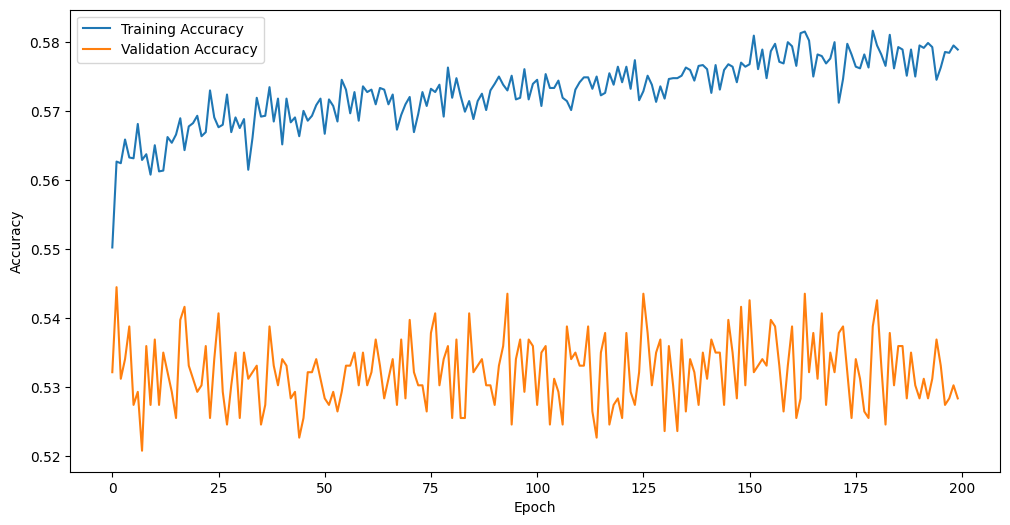

In [27]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Загрузка данных
data = pd.read_csv('applerevenue .csv')

# Функция для вычисления прибыли и преобразования в бинарную классификацию
def calculate_profit(row):
    open_price = row['open']
    close_price = row['close']
    volume = row['volume']

    if close_price > open_price:
        profit = 1  # Положительная прибыль
    else:
        profit = 0  # Отрицательная прибыль

    return profit

# Подготовка данных
features = data[['open', 'high', 'low', 'volume']].values
target = data.apply(calculate_profit, axis=1).values

# Нормализация данных
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

# Разделение данных на тренировочную, валидационную и тестовую выборки
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

# Определение архитектуры нейронной сети
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Обучение модели
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, batch_size=64)

# Оценка модели на тестовой выборке
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy * 100)

# Визуализация графика точности модели
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Epoch 1/200
132/132 [==============================] - 3s 9ms/step - loss: 0.6866 - accuracy: 0.5518 - val_loss: 0.6824 - val_accuracy: 0.5530
Epoch 2/200
132/132 [==============================] - 1s 11ms/step - loss: 0.6750 - accuracy: 0.5521 - val_loss: 0.6763 - val_accuracy: 0.5644
Epoch 3/200
132/132 [==============================] - 2s 12ms/step - loss: 0.6710 - accuracy: 0.5494 - val_loss: 0.6717 - val_accuracy: 0.5616
Epoch 4/200
132/132 [==============================] - 1s 8ms/step - loss: 0.6697 - accuracy: 0.5493 - val_loss: 0.6715 - val_accuracy: 0.5398
Epoch 5/200
132/132 [==============================] - 1s 7ms/step - loss: 0.6677 - accuracy: 0.5511 - val_loss: 0.6707 - val_accuracy: 0.5663
Epoch 6/200
132/132 [==============================] - 1s 7ms/step - loss: 0.6659 - accuracy: 0.5555 - val_loss: 0.6700 - val_accuracy: 0.5284
Epoch 7/200
132/132 [==============================] - 1s 7ms/step - loss: 0.6656 - accuracy: 0.5636 - val_loss: 0.6707 - val_accuracy: 0.52

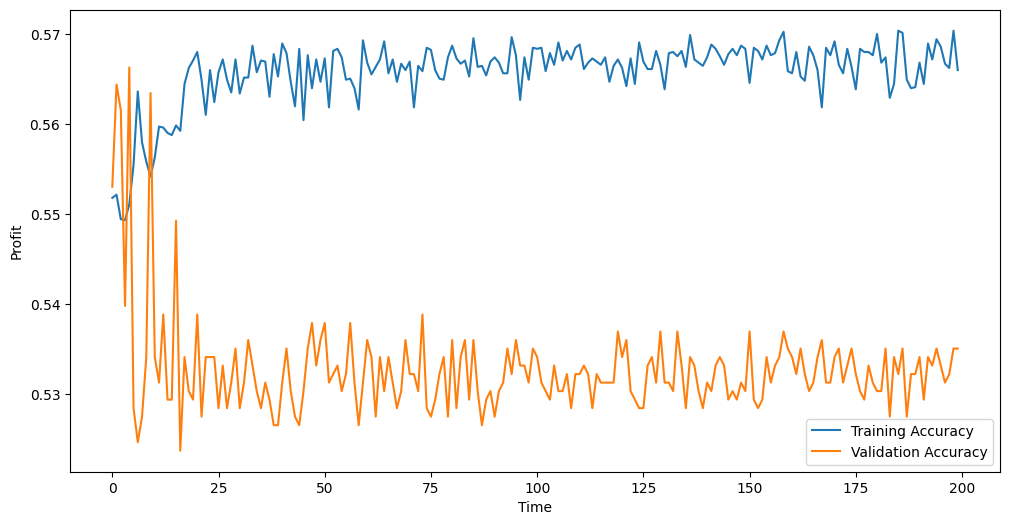

In [22]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Загрузка данных
data = pd.read_csv('applerevenue .csv')

# Функция для вычисления прибыли и преобразования в бинарную классификацию
def calculate_profit(row):
    open_price = row['open']
    close_price = row['close']
    volume = row['volume']

    if close_price > open_price:
        profit = 1  # Положительная прибыль
    else:
        profit = 0  # Отрицательная прибыль

    return profit

# Подготовка данных
features = data[['open', 'high', 'low', 'volume']].values
target = data.apply(calculate_profit, axis=1).values

# Нормализация данных
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

# Разделение данных на тренировочную, валидационную и тестовую выборки
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

# Определение архитектуры нейронной сети
model = tf.keras.Sequential([
    Dense(128, activation='relu', input_shape=(4,)),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early Stopping
early_stopping = EarlyStopping(patience=200, restore_best_weights=True)

# Обучение модели
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, batch_size=64, callbacks=[early_stopping])

# Оценка модели на тестовой выборке
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy * 100)

# Визуализация графика точности модели
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Time')
plt.ylabel('Profit')
plt.legend()
plt.show()


Epoch 1/200
132/132 [==============================] - 2s 7ms/step - loss: 0.6800 - accuracy: 0.5555 - val_loss: 0.6794 - val_accuracy: 0.5341
Epoch 2/200
132/132 [==============================] - 1s 5ms/step - loss: 0.6717 - accuracy: 0.5597 - val_loss: 0.6710 - val_accuracy: 0.5634
Epoch 3/200
132/132 [==============================] - 1s 5ms/step - loss: 0.6699 - accuracy: 0.5601 - val_loss: 0.6707 - val_accuracy: 0.5426
Epoch 4/200
132/132 [==============================] - 1s 5ms/step - loss: 0.6690 - accuracy: 0.5535 - val_loss: 0.6774 - val_accuracy: 0.5540
Epoch 5/200
132/132 [==============================] - 1s 5ms/step - loss: 0.6687 - accuracy: 0.5607 - val_loss: 0.6702 - val_accuracy: 0.5625
Epoch 6/200
132/132 [==============================] - 1s 4ms/step - loss: 0.6658 - accuracy: 0.5526 - val_loss: 0.6717 - val_accuracy: 0.5426
Epoch 7/200
132/132 [==============================] - 1s 5ms/step - loss: 0.6667 - accuracy: 0.5687 - val_loss: 0.6683 - val_accuracy: 0.5388

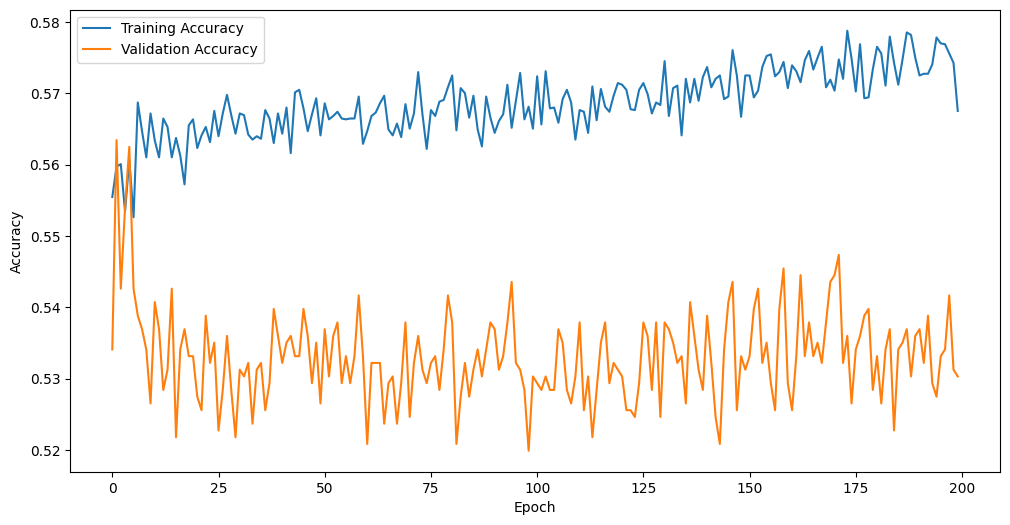

In [31]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping

# Загрузка данных
data = pd.read_csv('applerevenue .csv')

# Функция для вычисления прибыли и преобразования в бинарную классификацию
def calculate_profit(row):
    open_price = row['open']
    close_price = row['close']
    volume = row['volume']

    if close_price > open_price:
        profit = 1  # Положительная прибыль
    else:
        profit = 0  # Отрицательная прибыль

    return profit

# Подготовка данных
features = data[['open', 'high', 'low', 'volume']].values
target = data.apply(calculate_profit, axis=1).values

# Нормализация данных
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

# Разделение данных на тренировочную, валидационную и тестовую выборки
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

# Обучение нейронной сети
model = tf.keras.Sequential([
    Dense(128, input_shape=(4,)),
    LeakyReLU(alpha=0.1),
    Dropout(0.2),
    Dense(256),
    LeakyReLU(alpha=0.1),
    Dropout(0.2),
    Dense(128),
    LeakyReLU(alpha=0.1),
    Dropout(0.2),
    Dense(64),
    LeakyReLU(alpha=0.1),
    Dropout(0.2),
    Dense(32),
    LeakyReLU(alpha=0.1),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early Stopping
early_stopping = EarlyStopping(patience=200, restore_best_weights=True)

# Обучение модели
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, batch_size=64, callbacks=[early_stopping])

# Оценка модели на тестовой выборке
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy * 100)

# Визуализация графика точности модели
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Epoch 1/100
83/83 [==============================] - 6s 16ms/step - loss: 0.7797 - accuracy: 0.5257 - val_loss: 0.6954 - val_accuracy: 0.4443
Epoch 2/100
83/83 [==============================] - 1s 12ms/step - loss: 0.7230 - accuracy: 0.5372 - val_loss: 0.7004 - val_accuracy: 0.4606
Epoch 3/100
83/83 [==============================] - 1s 12ms/step - loss: 0.7138 - accuracy: 0.5439 - val_loss: 0.6986 - val_accuracy: 0.4496
Epoch 4/100
83/83 [==============================] - 1s 12ms/step - loss: 0.6972 - accuracy: 0.5499 - val_loss: 0.6879 - val_accuracy: 0.5367
Epoch 5/100
83/83 [==============================] - 1s 15ms/step - loss: 0.7036 - accuracy: 0.5355 - val_loss: 0.6846 - val_accuracy: 0.5557
Epoch 6/100
83/83 [==============================] - 2s 19ms/step - loss: 0.6924 - accuracy: 0.5488 - val_loss: 0.6792 - val_accuracy: 0.5644
Epoch 7/100
83/83 [==============================] - 1s 15ms/step - loss: 0.6885 - accuracy: 0.5584 - val_loss: 0.6774 - val_accuracy: 0.5587
Epoch 

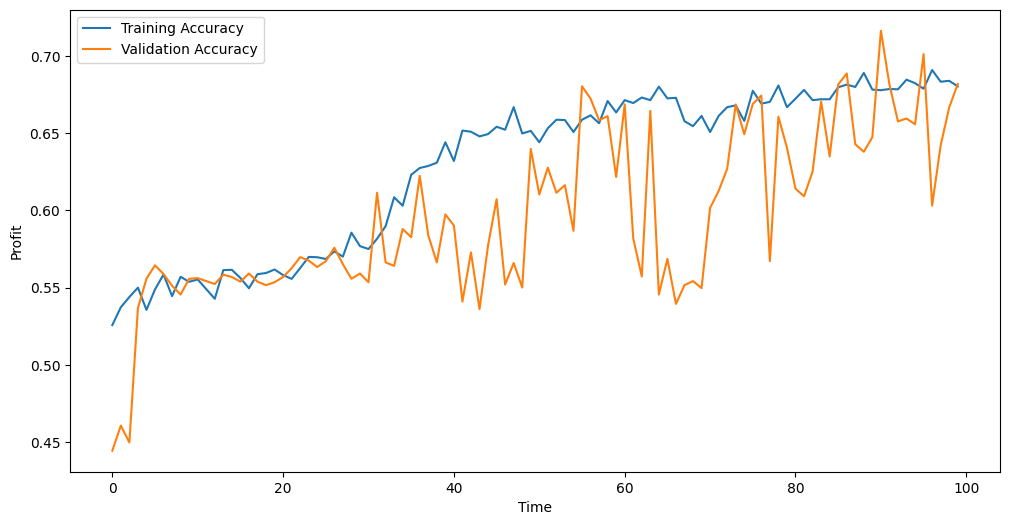

In [20]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import HeNormal

# Загрузка данных
data = pd.read_csv('applerevenue .csv')

# Функция для вычисления прибыли и преобразования в бинарную классификацию
def calculate_profit(row):
    open_price = row['open']
    close_price = row['close']
    volume = row['volume']

    if close_price > open_price:
        profit = 1  # Положительная прибыль
    else:
        profit = 0  # Отрицательная прибыль

    return profit

# Подготовка данных
features = data[['open', 'high', 'low', 'volume']].values
target = data.apply(calculate_profit, axis=1).values

# Нормализация данных
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

# Разделение данных на тренировочную, валидационную и тестовую выборки
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

# Обучение нейронной сети
model = tf.keras.Sequential([
    Dense(128, input_shape=(4,), kernel_initializer=HeNormal()),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.2),
    Dense(256, kernel_initializer=HeNormal()),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.2),
    Dense(128, kernel_initializer=HeNormal()),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, kernel_initializer=HeNormal()),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, kernel_initializer=HeNormal()),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Компиляция модели
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Early Stopping
early_stopping = EarlyStopping(patience=500, restore_best_weights=True)

# Обучение модели
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=64, callbacks=[early_stopping])

# Оценка модели на тестовой выборке
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy * 100)

# Визуализация графика точности модели
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Time')
plt.ylabel('Profit')
plt.legend()
plt.show()